In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

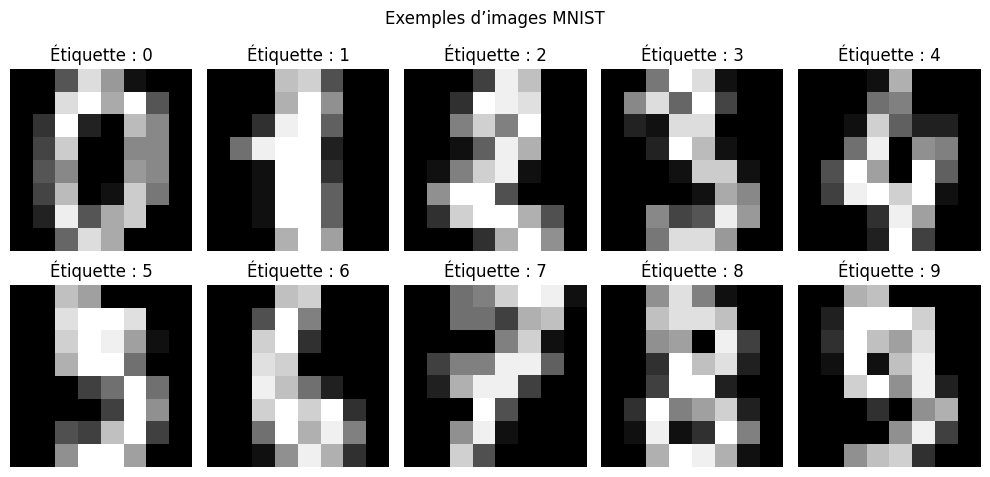

In [2]:
digits = load_digits()
X, y = digits.data, digits.target
# Affichage de quelques images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Étiquette : {digits.target[i]}")
    ax.axis("off")
plt.suptitle("Exemples d’images MNIST")
plt.tight_layout()
plt.show()

Rapport de classification :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00       181
           5       1.00      1.00      1.00       182
           6       1.00      1.00      1.00       181
           7       1.00      1.00      1.00       179
           8       1.00      1.00      1.00       174
           9       1.00      1.00      1.00       180

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797



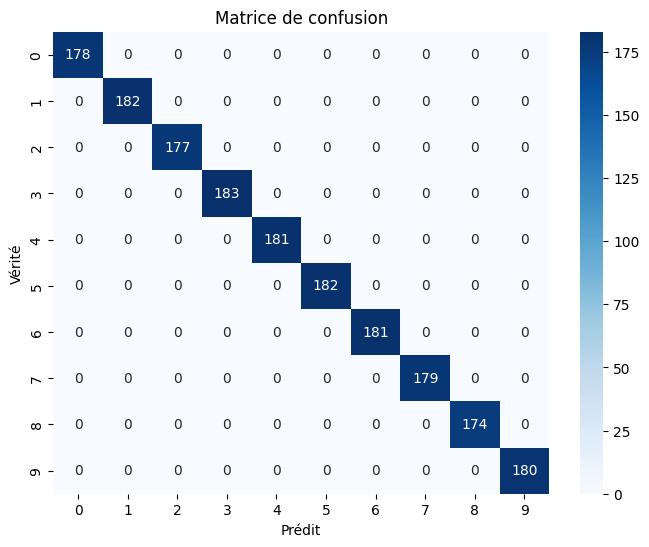

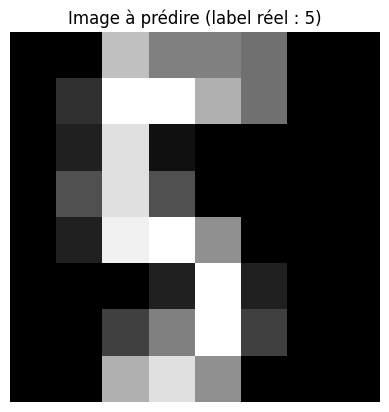

In [3]:
model = LogisticRegression(max_iter=2000)
model.fit(X, y)

# Prédiction et évaluation
y_pred = model.predict(X)
print("Rapport de classification :\n")
print(classification_report(y, y_pred))

# Matrice de confusion
conf = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Vérité")
plt.show()

# Prédiction interactive d’un chiffre
index = 25  
plt.imshow(X[index].reshape(8, 8), cmap='gray')
plt.title(f"Image à prédire (label réel : {y[index]})")
plt.axis("off")
plt.show()

probas = model.predict_proba([X[index]])[0]
prediction = np.argmax(probas)
confidence = probas[prediction] * 100